## Data Analysis Project on Super Store Sales Data downloaded from kaggle

## A. Sales Insights

Top-selling products identify kiye gaye

States aur Categories ke hisaab se revenue trend samjha

Seasonal trends / Quarters me peak sales highlight hue

## B. Profit Insights

Negative profit ka analysis:

Kaunse products / categories / ship modes zyada loss de rahe hain

Discount-heavy products aur small orders ka impact dikhaya

Extreme positive profit / loss outliers bhi identify kiye

## C. Business Recommendations

Loss-making products ka review karo → pricing / discount strategy optimize

Top products ka inventory aur shipping focus karo

Seasonal demand ke hisaab se marketing plan design karo

Ship Mode ke analysis se delivery strategy improve ho sakti hai

Example English text for report / GitHub:

## know i am going to explore the superstore sales data 

In [2]:
#import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
sale_data= pd.read_csv("D:\\Superstore Dataset.csv")

## Information About The Data

In [7]:
sale_data.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2019-103800,2019-01-03,2019-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,Texas,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
1,CA-2019-112326,2019-01-04,2019-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
2,CA-2019-112326,2019-01-04,2019-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748
3,CA-2019-112326,2019-01-04,2019-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870
4,CA-2019-141817,2019-01-05,2019-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,Pennsylvania,19143,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840


In [10]:
sale_data.tail()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9989,CA-2022-156720,2022-12-30,2023-01-03,Standard Class,JM-15580,Jill Matthias,Consumer,United States,Loveland,Colorado,80538,West,OFF-FA-10003472,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,3,0.2,-0.6048
9990,CA-2022-143259,2022-12-30,2023-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,New York,10009,East,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776,3,0.2,19.7910
9991,CA-2022-143259,2022-12-30,2023-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,New York,10009,East,TEC-PH-10004774,Technology,Phones,Gear Head AU3700S Headset,90.930,7,0.0,2.7279
9992,CA-2022-115427,2022-12-30,2023-01-03,Standard Class,EB-13975,Erica Bern,Corporate,United States,Fairfield,California,94533,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188
9993,CA-2022-143259,2022-12-30,2023-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,New York,10009,East,FUR-BO-10003441,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Fully Ass...",323.136,4,0.2,12.1176


In [13]:
sale_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Order Date     9994 non-null   object 
 2   Ship Date      9994 non-null   object 
 3   Ship Mode      9994 non-null   object 
 4   Customer ID    9994 non-null   object 
 5   Customer Name  9994 non-null   object 
 6   Segment        9994 non-null   object 
 7   Country        9994 non-null   object 
 8   City           9994 non-null   object 
 9   State          9994 non-null   object 
 10  Postal Code    9994 non-null   int64  
 11  Region         9994 non-null   object 
 12  Product ID     9994 non-null   object 
 13  Category       9994 non-null   object 
 14  Sub-Category   9994 non-null   object 
 15  Product Name   9994 non-null   object 
 16  Sales          9994 non-null   float64
 17  Quantity       9994 non-null   int64  
 18  Discount

In [15]:
sale_data['Order Date'] = pd.to_datetime(sale_data['Order Date'])


In [16]:
sale_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9994 non-null   object        
 1   Order Date     9994 non-null   datetime64[ns]
 2   Ship Date      9994 non-null   object        
 3   Ship Mode      9994 non-null   object        
 4   Customer ID    9994 non-null   object        
 5   Customer Name  9994 non-null   object        
 6   Segment        9994 non-null   object        
 7   Country        9994 non-null   object        
 8   City           9994 non-null   object        
 9   State          9994 non-null   object        
 10  Postal Code    9994 non-null   int64         
 11  Region         9994 non-null   object        
 12  Product ID     9994 non-null   object        
 13  Category       9994 non-null   object        
 14  Sub-Category   9994 non-null   object        
 15  Product Name   9994 n

In [17]:
sale_data.shape

(9994, 20)

In [20]:
sale_data.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [25]:
sale_data['Sales'].value_counts().sum()

9994

In [26]:
sale_data['Sales'].sum()


2297200.8603

In [27]:
sale_data.describe()

,Order Date,Postal Code,Sales,Quantity,Discount,Profit
count,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,2021-04-30 00:07:12.259355648,55190.379428,229.858001,3.789574,0.156203,28.656896
min,2019-01-03 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2020-05-22 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,2021-06-26 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,2022-05-14 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,2022-12-30 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108


## Data cleaning Techniques

In [28]:
sale_data.isnull()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9990,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9991,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9992,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [29]:
sale_data.isnull().sum()

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [30]:
#checking duplicate data in sale_data
sale_data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9989    False
9990    False
9991    False
9992    False
9993    False
Length: 9994, dtype: bool

In [37]:
sale_data['Sales'].dtype  #when we checking the datatype of the sales 

dtype('float64')

## Coloumns operation

In [38]:
sale_data[['Product Name' , 'Sales']]

,Product Name,Sales
0,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448
1,Avery 508,11.784
2,SAFCO Boltless Steel Shelving,272.736
3,GBC Standard Plastic Binding Systems Combs,3.540
4,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536
...,...,...
9989,Bagged Rubber Bands,3.024
9990,Wilson Jones Legal Size Ring Binders,52.776
9991,Gear Head AU3700S Headset,90.930
9992,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904


In [41]:
top_5_product=sale_data.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(5)
top_5_product

Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
Name: Sales, dtype: float64

In [45]:
top_catagory=sale_data.groupby('Category')['Sales'].sum()
top_catagory

Category
Furniture          741999.7953
Office Supplies    719047.0320
Technology         836154.0330
Name: Sales, dtype: float64

In [47]:
# top_catagory=sale_data.groupby('Category')['Sales'].sum().sort_values(ascending=False).head(5)
# top_catagory

In [52]:
top_sub_catagory=sale_data.groupby('Sub-Category')['Sales'].sum()
top_sub_catagory

Sub-Category
Accessories    167380.3180
Appliances     107532.1610
Art             27118.7920
Binders        203412.7330
Bookcases      114879.9963
Chairs         328449.1030
Copiers        149528.0300
Envelopes       16476.4020
Fasteners        3024.2800
Furnishings     91705.1640
Labels          12486.3120
Machines       189238.6310
Paper           78479.2060
Phones         330007.0540
Storage        223843.6080
Supplies        46673.5380
Tables         206965.5320
Name: Sales, dtype: float64

In [53]:
top_sub_catagory=sale_data.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).head(5)
top_sub_catagory

Sub-Category
Phones     330007.054
Chairs     328449.103
Storage    223843.608
Tables     206965.532
Binders    203412.733
Name: Sales, dtype: float64

In [57]:
country_sales=sale_data.groupby('Country')['Sales'].sum()
country_sales

Country
United States    2.297201e+06
Name: Sales, dtype: float64

In [58]:
country_sales=sale_data['Country'].nunique()
country_sales

1

In [61]:
city_sales=sale_data.groupby('City')['Sales'].sum()
city_sales

City
Aberdeen         25.500
Abilene           1.392
Akron          2729.986
Albuquerque    2220.160
Alexandria     5519.570
                 ...   
Woonsocket      195.550
Yonkers        7657.666
York            817.978
Yucaipa          50.800
Yuma            840.865
Name: Sales, Length: 531, dtype: float64

In [63]:
city_sales=sale_data.groupby('City')['Sales'].sum().sort_values(ascending=False).head(5)
city_sales

City
New York City    256368.161
Los Angeles      175851.341
Seattle          119540.742
San Francisco    112669.092
Philadelphia     109077.013
Name: Sales, dtype: float64

In [64]:
state_sales=sale_data.groupby('State')['Sales'].sum().sort_values(ascending=False).head(5)
state_sales

State
California      457687.6315
New York        310876.2710
Texas           170188.0458
Washington      138641.2700
Pennsylvania    116511.9140
Name: Sales, dtype: float64

In [66]:
region_sales=sale_data.groupby('Region')['Sales'].sum().sort_values(ascending=False).head(5)
region_sales

Region
West       725457.8245
East       678781.2400
Central    501239.8908
South      391721.9050
Name: Sales, dtype: float64

In [67]:
customer_name_sales=sale_data.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(5)
customer_name_sales

Customer Name
Sean Miller      25043.050
Tamara Chand     19052.218
Raymond Buch     15117.339
Tom Ashbrook     14595.620
Adrian Barton    14473.571
Name: Sales, dtype: float64

In [68]:
segment_sales=sale_data.groupby('Segment')['Sales'].sum().sort_values(ascending=False).head(5)
segment_sales

Segment
Consumer       1.161401e+06
Corporate      7.061464e+05
Home Office    4.296531e+05
Name: Sales, dtype: float64

In [73]:
segment_profit = (sale_data.groupby('Segment').agg({'Sales': 'sum','Profit': 'sum'}).sort_values(by='Sales',ascending=False))
segment_profit


,Sales,Profit
Segment,,
Consumer,1.161401e+06,134119.2092
Corporate,7.061464e+05,91979.1340
Home Office,4.296531e+05,60298.6785


In [74]:
sale_data['Profit'].sum()

286397.0217

In [75]:
(sale_data.groupby('Product Name').agg({'Sales': 'sum','Profit': 'sum'}).sort_values(by='Sales',ascending=False).head(5))

,Sales,Profit
Product Name,,
Canon imageCLASS 2200 Advanced Copier,61599.824,2.519993e+04
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,27453.384,7.753039e+03
Cisco TelePresence System EX90 Videoconferencing Unit,22638.480,-1.811078e+03
HON 5400 Series Task Chairs for Big and Tall,21870.576,1.136868e-13
GBC DocuBind TL300 Electric Binding System,19823.479,2.233505e+03


In [76]:
# Calculate Profit
sale_data[['Product Name', 'Sales', 'Discount', 'Profit']].sort_values(by='Profit').head(10)


,Product Name,Sales,Discount,Profit
6280,Cubify CubeX 3D Printer Double Head Print,4499.985,0.7,-6599.9780
9127,Cubify CubeX 3D Printer Triple Head Print,7999.980,0.5,-3839.9904
797,GBC DocuBind P400 Electric Binding System,2177.584,0.8,-3701.8928
7293,Lexmark MX611dhe Monochrome Laser Printer,2549.985,0.7,-3399.9800
9665,Ibico EPK-21 Electric Binding System,1889.990,0.8,-2929.4845
3951,Cubify CubeX 3D Printer Double Head Print,1799.994,0.7,-2639.9912
9384,Fellowes PB500 Electric Punch Plastic Comb Bin...,1525.188,0.8,-2287.7820
2044,Chromcraft Bull-Nose Wood Oval Conference Tabl...,4297.644,0.4,-1862.3124
4483,GBC DocuBind P400 Electric Binding System,1088.792,0.8,-1850.9464
212,Cisco TelePresence System EX90 Videoconferenci...,22638.480,0.5,-1811.0784


In [78]:
neg_profit = sale_data[sale_data['Profit'] < 0]
neg_profit

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2,CA-2019-112326,2019-01-04,2019-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.7360,3,0.20,-64.7748
3,CA-2019-112326,2019-01-04,2019-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.5400,2,0.80,-5.4870
14,CA-2019-105417,2019-01-07,2019-01-12,Standard Class,VS-21820,Vivek Sundaresam,Consumer,United States,Huntsville,Texas,77340,Central,FUR-FU-10004864,Furniture,Furnishings,"Howard Miller 14-1/2"" Diameter Chrome Round Wa...",76.7280,3,0.60,-53.7096
15,CA-2019-105417,2019-01-07,2019-01-12,Standard Class,VS-21820,Vivek Sundaresam,Consumer,United States,Huntsville,Texas,77340,Central,OFF-BI-10003708,Office Supplies,Binders,Acco Four Pocket Poly Ring Binder with Label H...,10.4300,7,0.80,-18.2525
24,CA-2019-118192,2019-01-13,2019-01-18,Standard Class,MM-17920,Michael Moore,Consumer,United States,Newark,Ohio,43055,East,OFF-BI-10003476,Office Supplies,Binders,Avery Metallic Poly Binders,3.4380,2,0.70,-2.5212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9970,CA-2022-163860,2022-12-28,2023-01-01,Standard Class,LO-17170,Lori Olson,Corporate,United States,Peoria,Illinois,61604,Central,FUR-FU-10001935,Furniture,Furnishings,3M Hangers With Command Adhesive,2.9600,2,0.60,-1.4060
9971,CA-2022-136539,2022-12-28,2023-01-01,Standard Class,GH-14665,Greg Hansen,Consumer,United States,Round Rock,Texas,78664,Central,FUR-BO-10004709,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",78.8528,2,0.32,-11.5960
9974,US-2022-162068,2022-12-28,2022-12-31,Second Class,PC-18745,Pamela Coakley,Corporate,United States,Loveland,Colorado,80538,West,OFF-BI-10002813,Office Supplies,Binders,Avery Reinforcements for Hole-Punch Pages,1.1880,2,0.70,-0.9900
9981,CA-2022-118885,2022-12-29,2023-01-02,Standard Class,JG-15160,James Galang,Consumer,United States,Los Angeles,California,90049,West,FUR-CH-10002880,Furniture,Chairs,"Global High-Back Leather Tilter, Burgundy",393.5680,4,0.20,-44.2764


In [79]:
neg_profit[['Product Name', 'Sales', 'Discount', 'Profit']].sort_values(by='Profit')


,Product Name,Sales,Discount,Profit
6280,Cubify CubeX 3D Printer Double Head Print,4499.985,0.7,-6599.9780
9127,Cubify CubeX 3D Printer Triple Head Print,7999.980,0.5,-3839.9904
797,GBC DocuBind P400 Electric Binding System,2177.584,0.8,-3701.8928
7293,Lexmark MX611dhe Monochrome Laser Printer,2549.985,0.7,-3399.9800
9665,Ibico EPK-21 Electric Binding System,1889.990,0.8,-2929.4845
...,...,...,...,...
2429,SanDisk Cruzer 16 GB USB Flash Drive,27.552,0.2,-0.3444
7620,Tensor Brushed Steel Torchiere Floor Lamp,13.592,0.2,-0.3398
3756,Kingston Digital DataTraveler 16GB USB 2.0,21.480,0.2,-0.2685
8382,Acco Perma 3000 Stacking Storage Drawers,16.784,0.2,-0.2098


## We're going to apply analsis techiniques (EDA).We perform the Univariate analysis , Bivariate analysis and Multivariate Analysis

In [80]:
sale_data.dtypes

Order ID                 object
Order Date       datetime64[ns]
Ship Date                object
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [81]:
sale_data['Order ID'] = pd.to_numeric(sale_data['Order ID'], errors='coerce').astype('Int64')
sale_data['Customer ID'] = pd.to_numeric(sale_data['Customer ID'], errors='coerce').astype('Int64')
sale_data['Product ID'] = pd.to_numeric(sale_data['Product ID'], errors='coerce').astype('Int64')


In [83]:
sale_data['Ship Date'] = pd.to_datetime(sale_data['Ship Date'], errors='coerce')

In [84]:
sale_data.dtypes

Order ID                  Int64
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID               Int64
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID                Int64
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

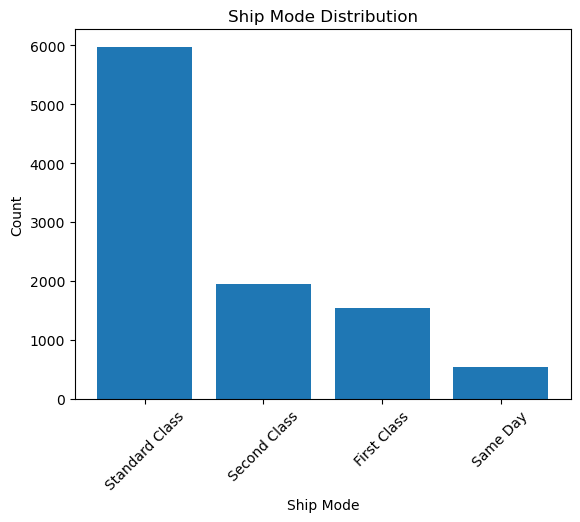

In [89]:
ship_counts = sale_data['Ship Mode'].value_counts()

x_bar = ship_counts.index
y_bar = ship_counts.values

plt.bar(x_bar, y_bar)
# plt.figure((figsize==(8,6)))
plt.xticks(rotation=45)
plt.xlabel('Ship Mode')
plt.ylabel('Count')
plt.title('Ship Mode Distribution')
plt.show()


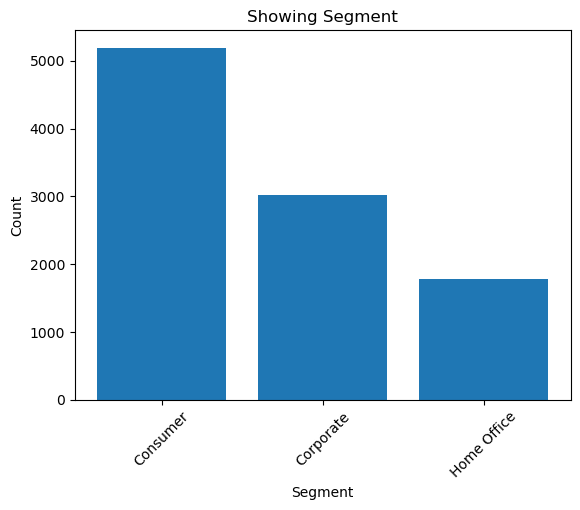

In [90]:
ship_counts = sale_data['Segment'].value_counts()

x_bar = ship_counts.index
y_bar = ship_counts.values

plt.bar(x_bar, y_bar)
# plt.figure((figsize==(8,6)))
plt.xticks(rotation=45)
plt.xlabel('Segment')
plt.ylabel('Count')
plt.title('Showing Segment')
plt.show()

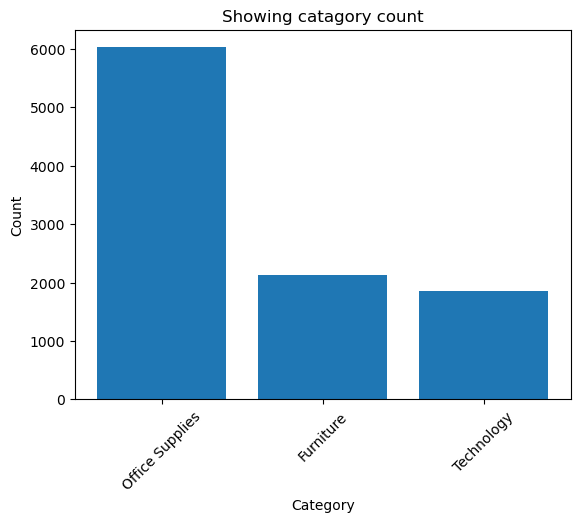

In [92]:
ship_counts = sale_data['Category'].value_counts()

x_bar = ship_counts.index
y_bar = ship_counts.values

plt.bar(x_bar, y_bar)
# plt.figure((figsize==(8,6)))
plt.xticks(rotation=45)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Showing catagory count')
plt.show()

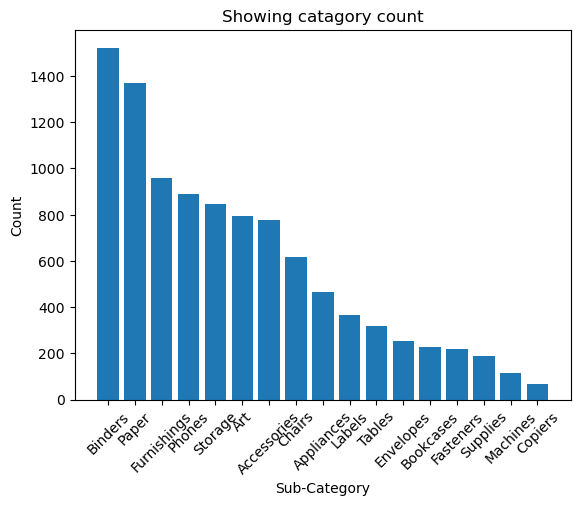

In [93]:
ship_counts = sale_data['Sub-Category'].value_counts()

x_bar = ship_counts.index
y_bar = ship_counts.values

plt.bar(x_bar, y_bar)
# plt.figure((figsize==(8,6)))
plt.xticks(rotation=45)
plt.xlabel('Sub-Category')
plt.ylabel('Count')
plt.title('Showing catagory count')
plt.show()

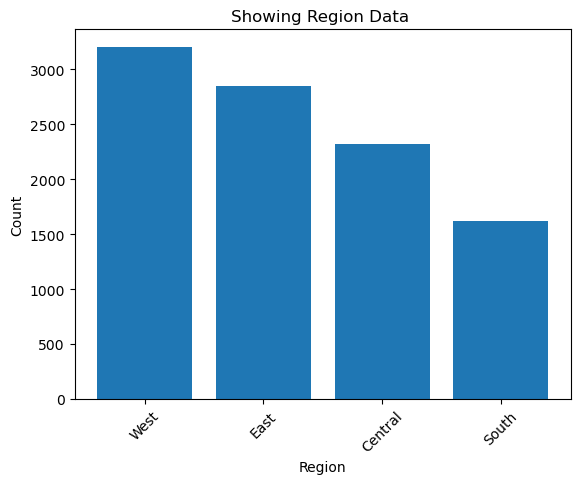

In [94]:
ship_counts = sale_data['Region'].value_counts()

x_bar = ship_counts.index
y_bar = ship_counts.values

plt.bar(x_bar, y_bar)
# plt.figure((figsize==(8,6)))
plt.xticks(rotation=45)
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Showing Region Data ')
plt.show()

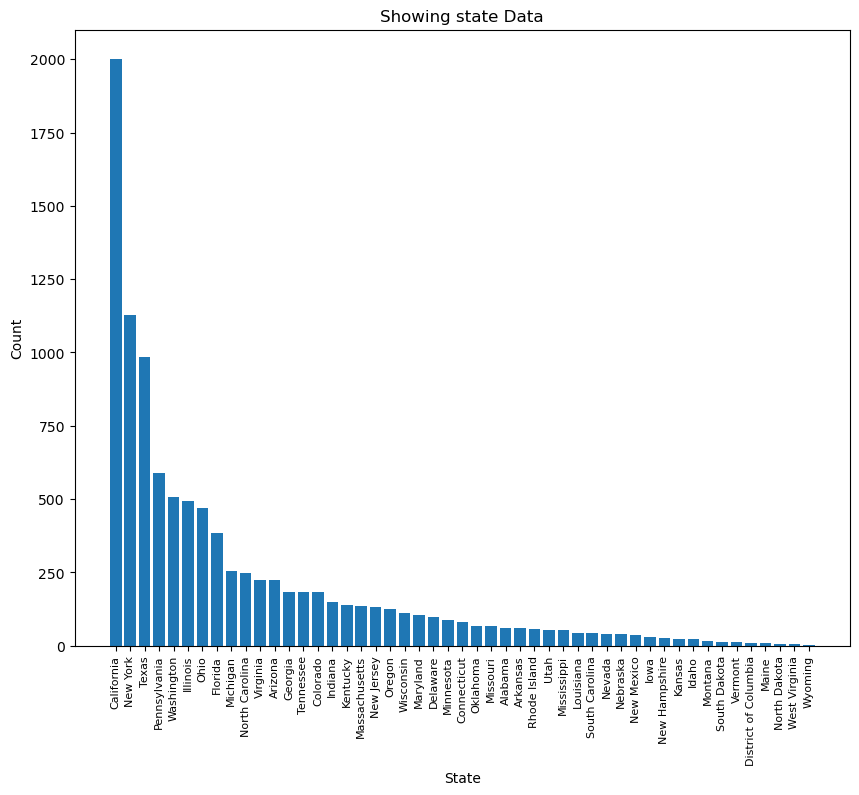

In [103]:
plt.figure(figsize=(10, 8))

ship_counts = sale_data['State'].value_counts()

x_bar = ship_counts.index
y_bar = ship_counts.values

plt.bar(x_bar, y_bar)
plt.xticks(rotation=90 ,fontsize=8)
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Showing state Data')
plt.show()


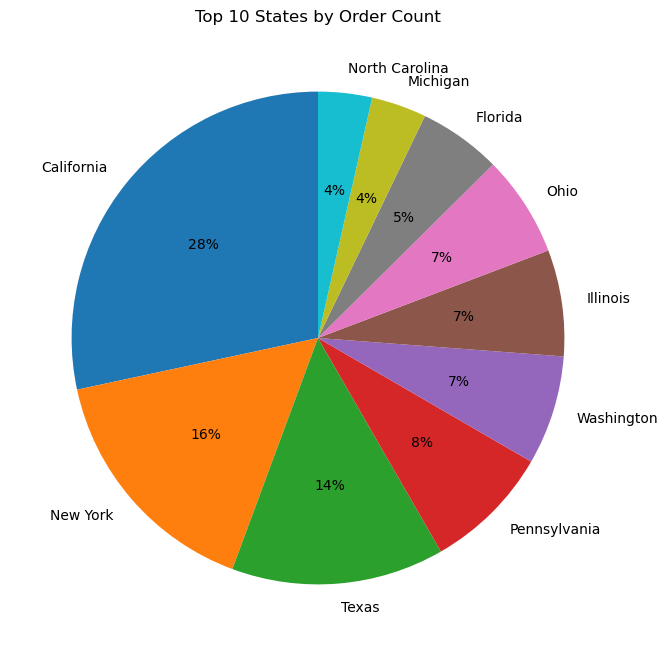

In [106]:
state_counts = sale_data['State'].value_counts().head(10)
plt.figure(figsize=(8, 8))
plt.pie(
    state_counts.values,
    labels=state_counts.index,
    autopct='%0.0f%%',
    startangle=90
)
plt.title('Top 10 States by Order Count')
plt.show()

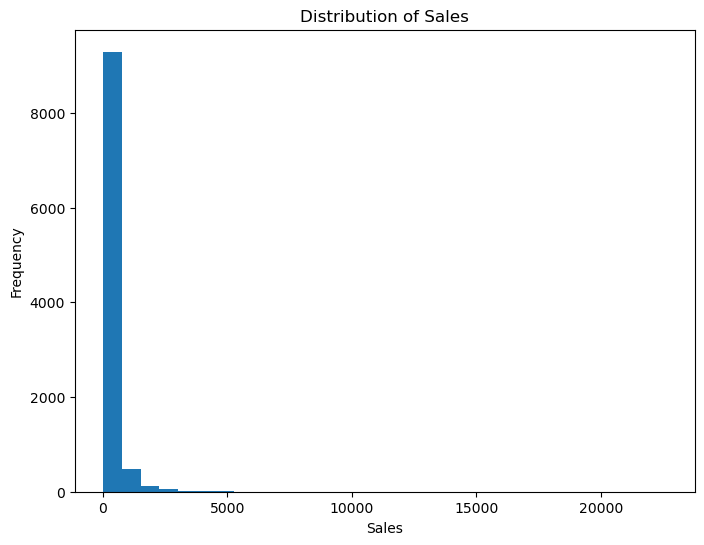

In [107]:
plt.figure(figsize=(8, 6))
plt.hist(sale_data['Sales'], bins=30)
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Sales')
plt.show()

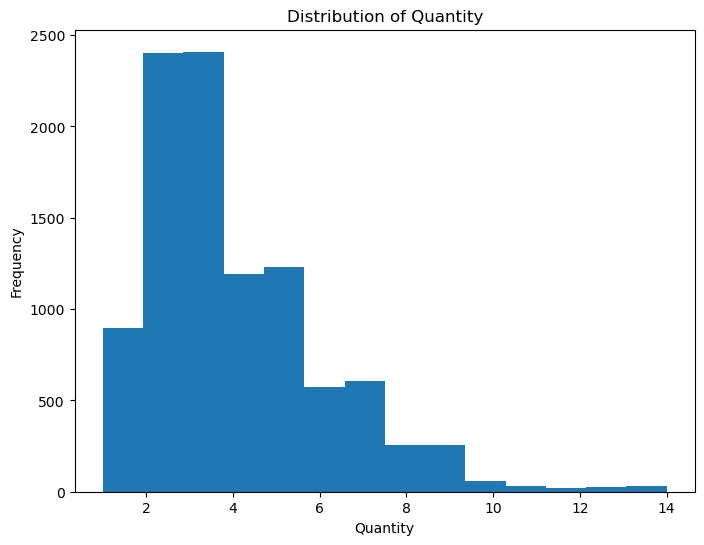

In [115]:
plt.figure(figsize=(8, 6))
plt.hist(sale_data['Quantity'], bins=14)
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.title('Distribution of Quantity')
plt.show()

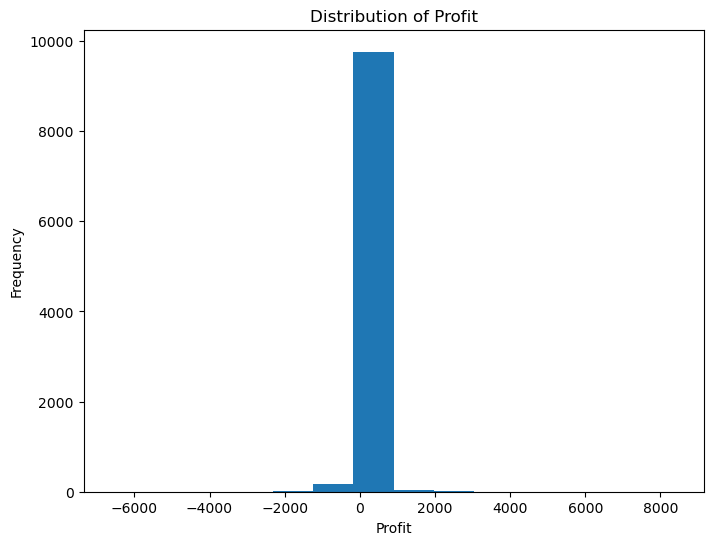

In [119]:
plt.figure(figsize=(8, 6))
plt.hist(sale_data['Profit'], bins=14)
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.title('Distribution of Profit')
plt.show()

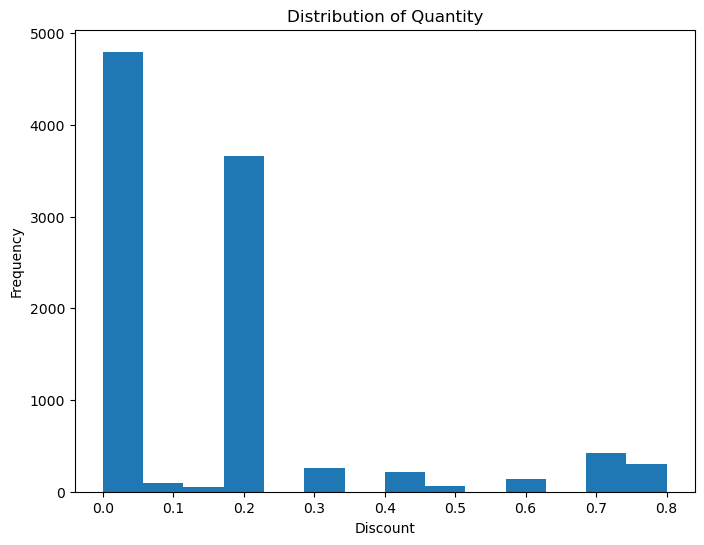

In [120]:
plt.figure(figsize=(8, 6))
plt.hist(sale_data['Discount'], bins=14)
plt.xlabel('Discount')
plt.ylabel('Frequency')
plt.title('Distribution of Quantity')
plt.show()

## Bivariate Analysis

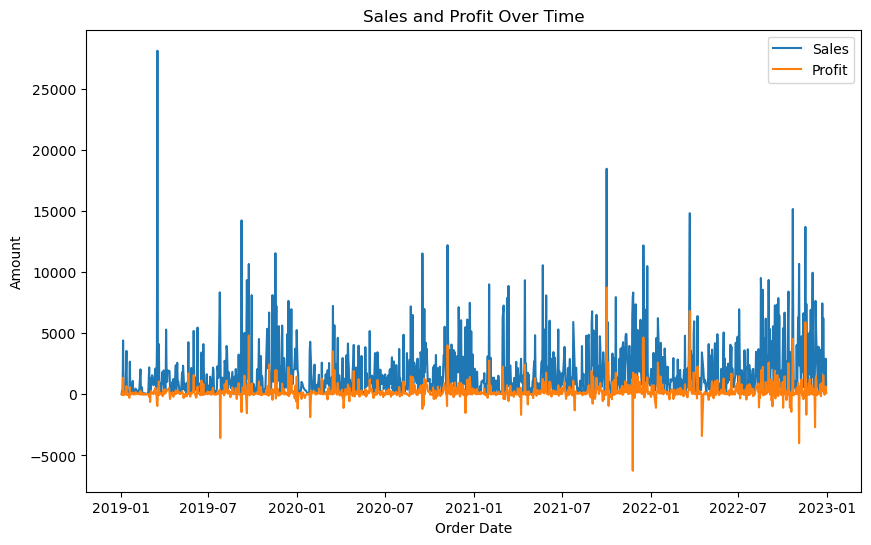

In [121]:
#aggregation on the basis of Date
time_data = sale_data.groupby('Order Date')[['Sales', 'Profit']].sum()

plt.figure(figsize=(10, 6))
plt.plot(time_data.index, time_data['Sales'], label='Sales')
plt.plot(time_data.index, time_data['Profit'], label='Profit')

plt.xlabel('Order Date')
plt.ylabel('Amount')
plt.title('Sales and Profit Over Time')
plt.legend()
plt.show()


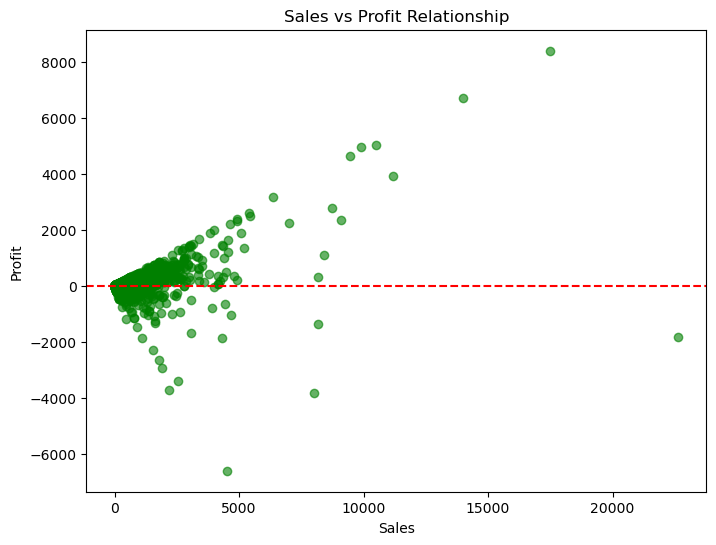

In [125]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(
    sale_data['Sales'],
    sale_data['Profit'],
    color='green',     
    alpha=0.6)
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.title('Sales vs Profit Relationship')
plt.axhline(0, color='red', linestyle='--')  # reference line bhi color ke sath
plt.show()



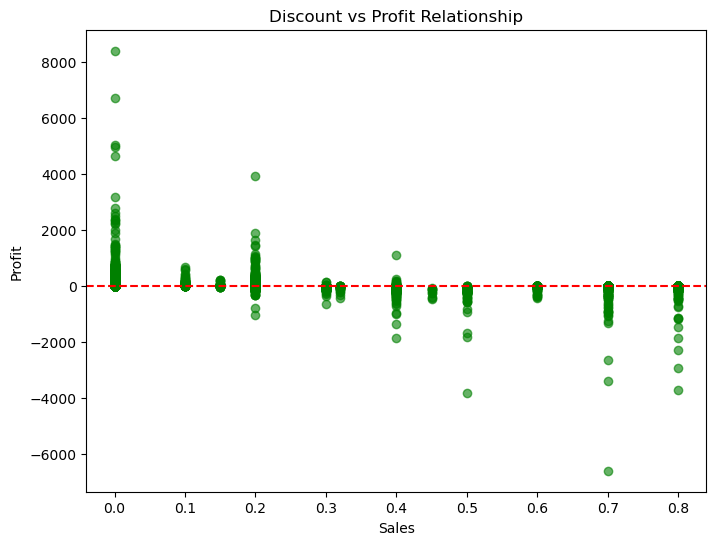

In [127]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(
    sale_data['Discount'],
    sale_data['Profit'],
    color='green',      # yahan color change
    alpha=0.6
)

plt.xlabel('Sales')
plt.ylabel('Profit')
plt.title('Discount vs Profit Relationship')
plt.axhline(0, color='red', linestyle='--')  # reference line bhi color ke sath
plt.show()


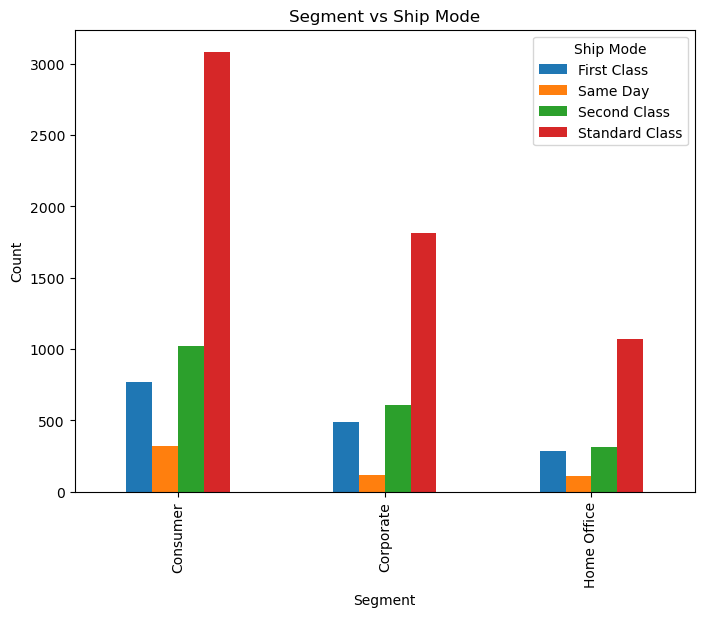

In [128]:
ct = pd.crosstab(sale_data['Segment'], sale_data['Ship Mode'])

ct.plot(kind='bar', figsize=(8, 6))
plt.xlabel('Segment')
plt.ylabel('Count')
plt.title('Segment vs Ship Mode')
plt.legend(title='Ship Mode')
plt.show()

## Multivariate Analysis

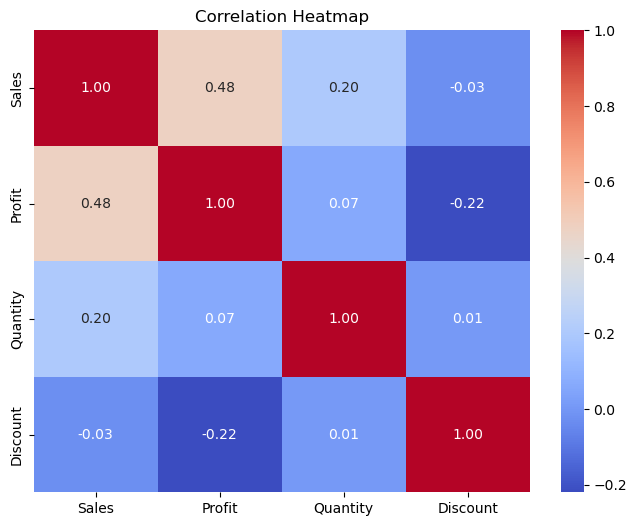

In [129]:
# Select numerical columns
num_cols = ['Sales', 'Profit', 'Quantity', 'Discount']

plt.figure(figsize=(8, 6))
corr = sale_data[num_cols].corr()  # correlation matrix
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


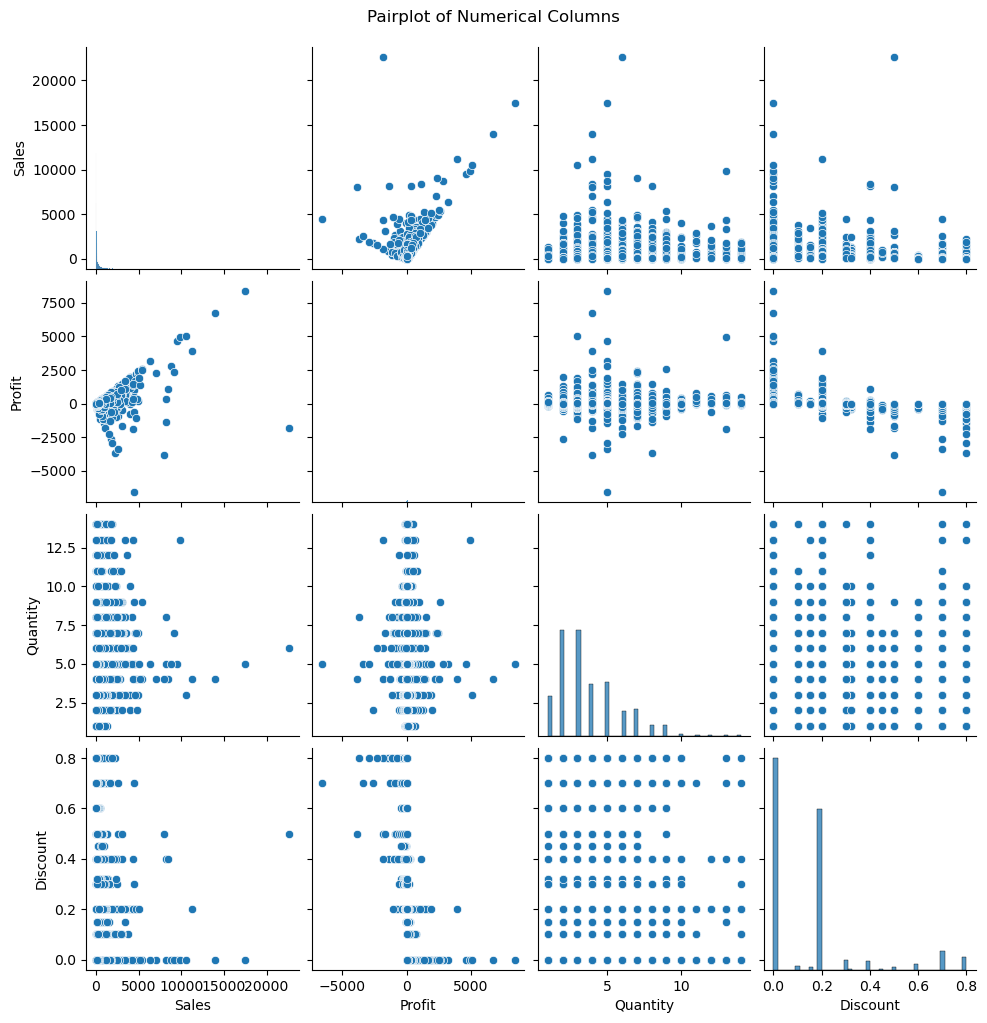

In [130]:
sns.pairplot(sale_data[num_cols])
plt.suptitle('Pairplot of Numerical Columns', y=1.02)
plt.show()


In [131]:
# Extract season / month
sale_data['Month'] = sale_data['Order Date'].dt.month
sale_data['Quarter'] = sale_data['Order Date'].dt.quarter

In [132]:
# Aggregate Sales by Product + Category + State
top_products = sale_data.groupby(
    ['Product Name', 'Category', 'State', 'Quarter']
)['Sales'].sum().reset_index()

In [133]:
# Get top 10 selling products
top_products = top_products.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10).reset_index()

In [134]:
top_sales_data = sale_data[sale_data['Product Name'].isin(top_products['Product Name'])]


C:\Users\123\AppData\Local\Temp\ipykernel_5988\187612249.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


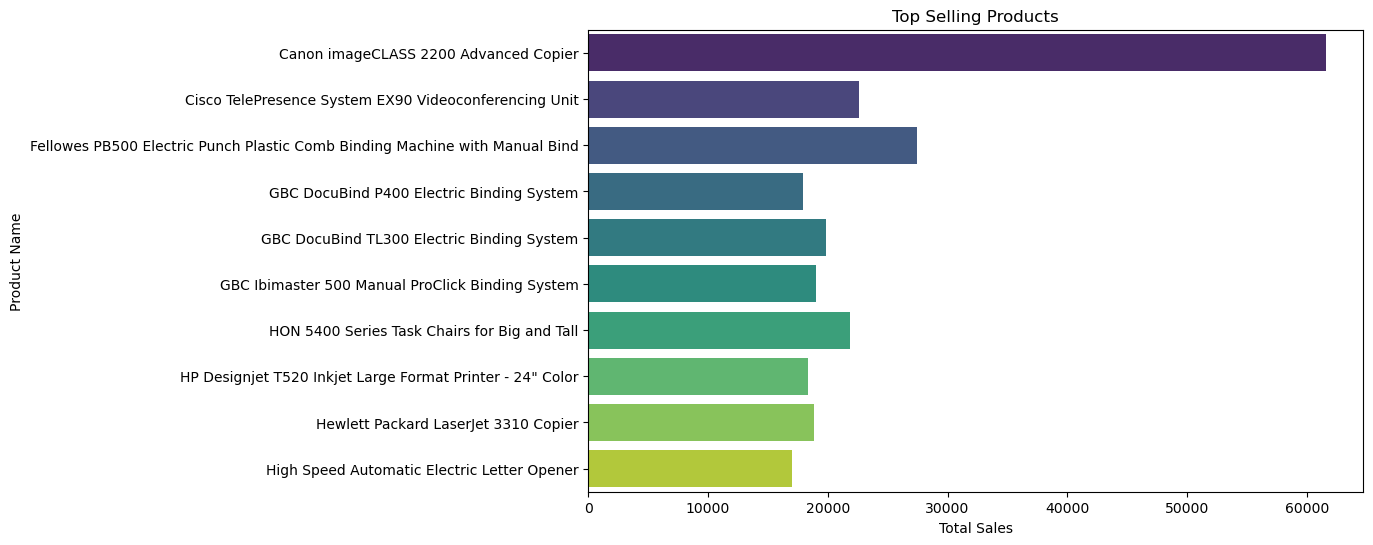

In [135]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_sales_data.groupby('Product Name')['Sales'].sum().reset_index(),
    x='Sales',
    y='Product Name',
    palette='viridis'
)
plt.title('Top Selling Products')
plt.xlabel('Total Sales')
plt.ylabel('Product Name')
plt.show()

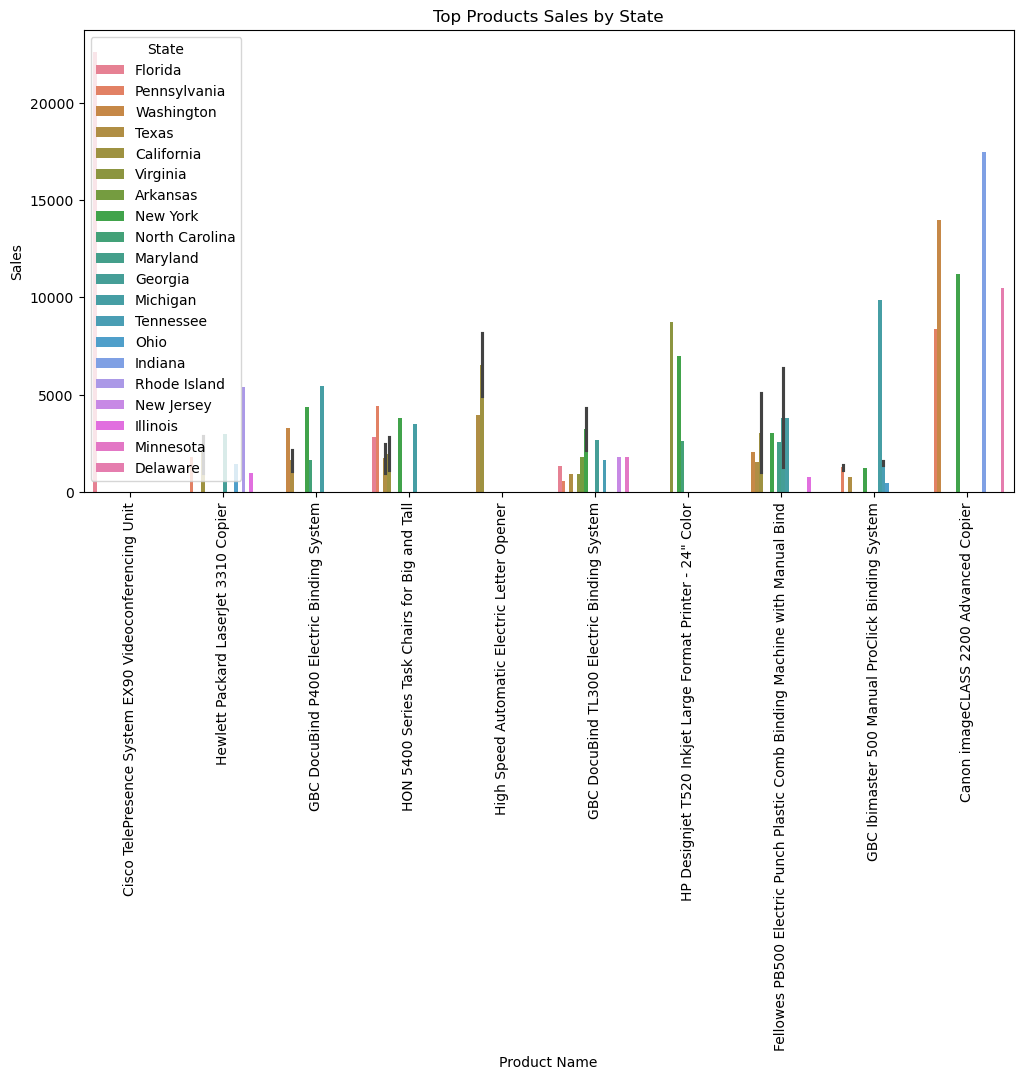

In [137]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_sales_data,
    x='Product Name',
    y='Sales',
    hue='State'
)
plt.xticks(rotation=90)
plt.title('Top Products Sales by State')
plt.show()


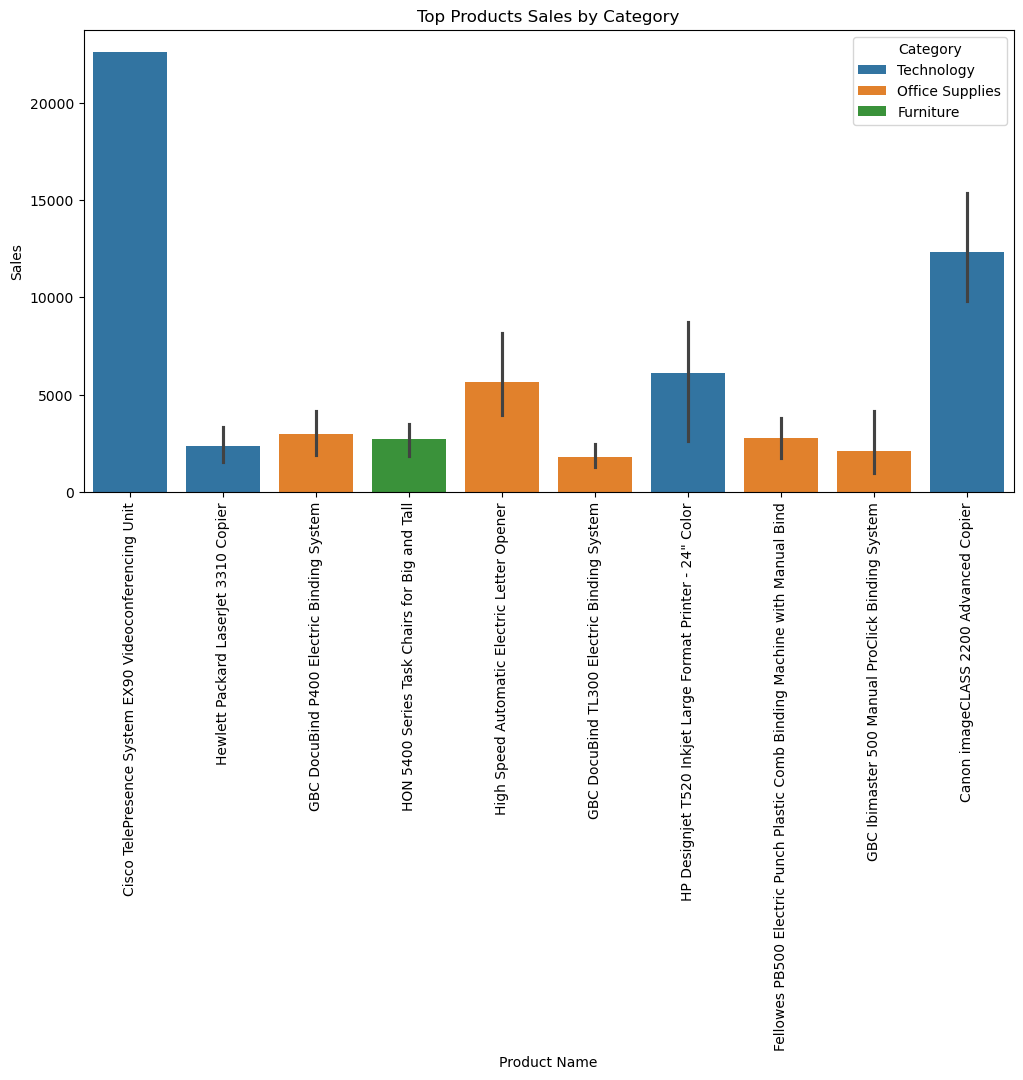

In [139]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_sales_data,
    x='Product Name',
    y='Sales',
    hue='Category'
)
plt.xticks(rotation=90)
plt.title('Top Products Sales by Category')
plt.show()


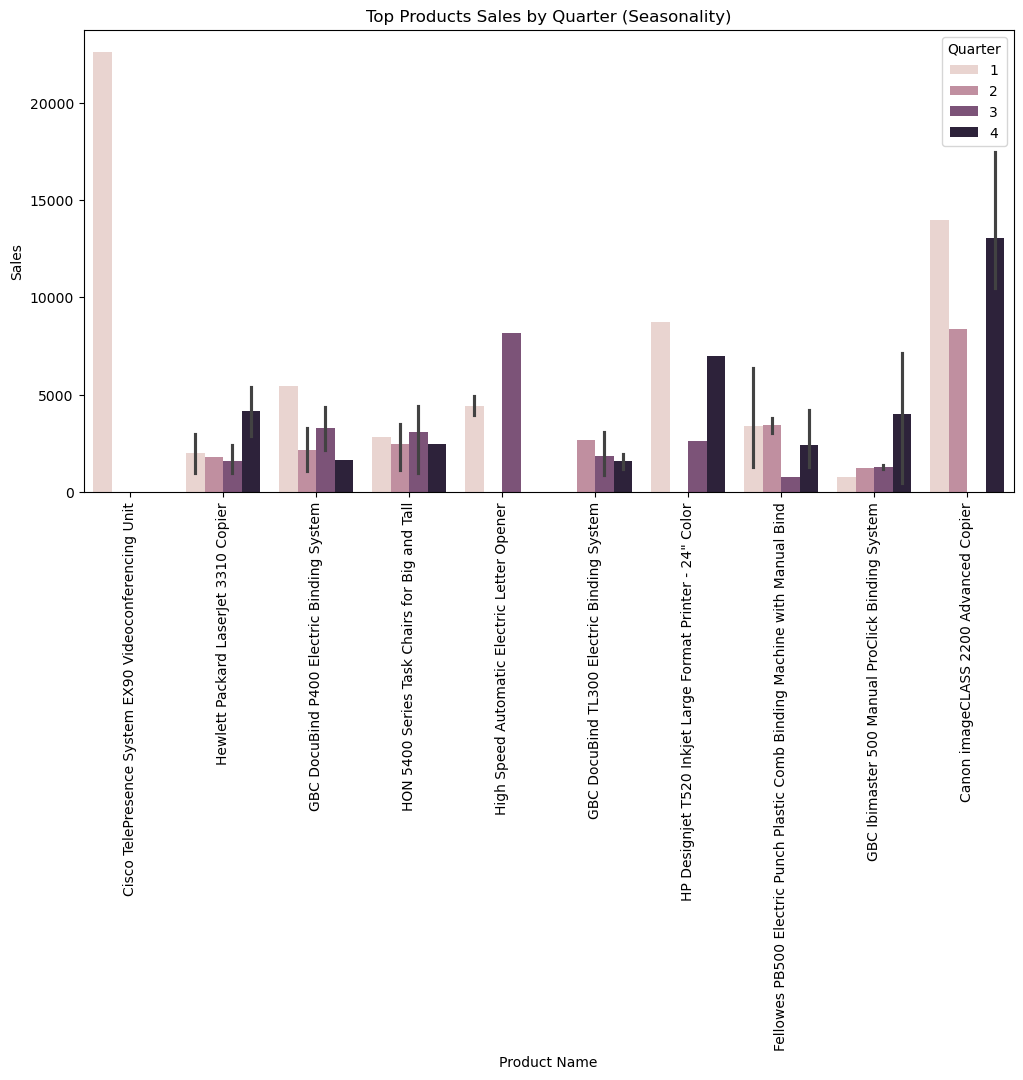

In [141]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_sales_data,
    x='Product Name',
    y='Sales',
    hue='Quarter'
)
plt.xticks(rotation=90)
plt.title('Top Products Sales by Quarter (Seasonality)')
plt.show()


In [142]:
ship_sales = sale_data.groupby('Ship Mode')['Sales'].sum().reset_index()


C:\Users\123\AppData\Local\Temp\ipykernel_5988\307758398.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ship_sales, x='Ship Mode', y='Sales', palette='coolwarm')


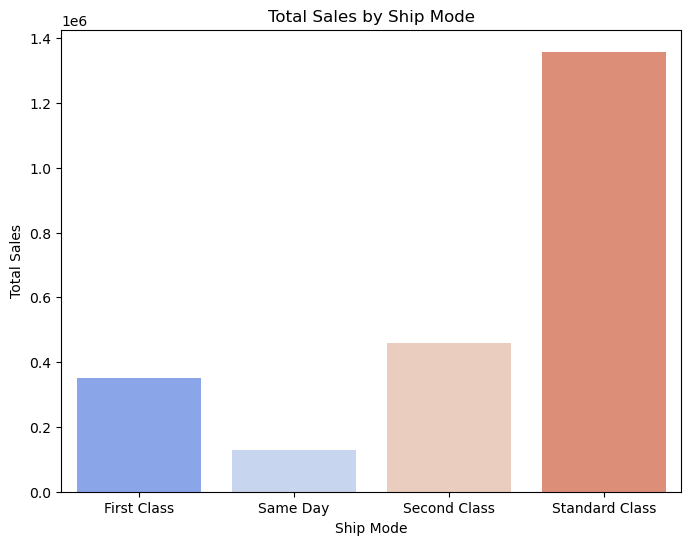

In [143]:
plt.figure(figsize=(8, 6))
sns.barplot(data=ship_sales, x='Ship Mode', y='Sales', palette='coolwarm')

plt.title('Total Sales by Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Total Sales')
plt.show()

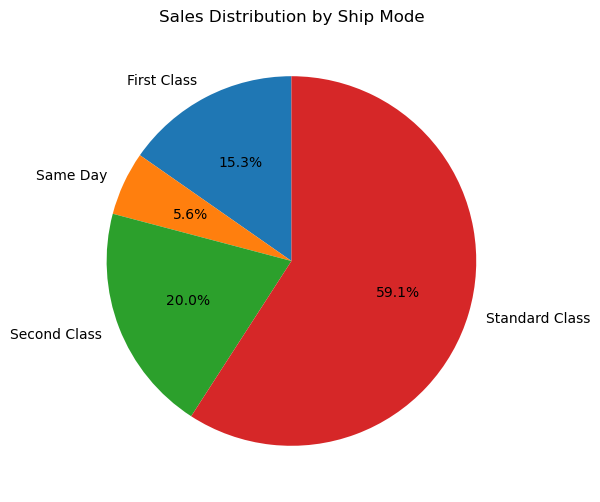

In [144]:
plt.figure(figsize=(6, 6))
plt.pie(ship_sales['Sales'], labels=ship_sales['Ship Mode'], autopct='%1.1f%%', startangle=90)
plt.title('Sales Distribution by Ship Mode')
plt.show()


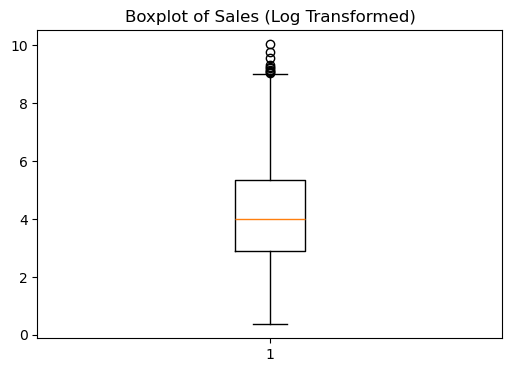

In [148]:
plt.figure(figsize=(6, 4))
plt.boxplot(np.log1p(sale_data['Sales']))  # log1p = log(1 + x) to handle zero
plt.title('Boxplot of Sales (Log Transformed)')
plt.show()


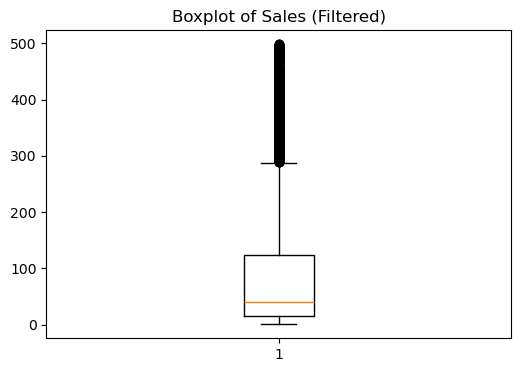

In [149]:
Q1 = sale_data['Sales'].quantile(0.25)
Q3 = sale_data['Sales'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

# Filter for plotting only
sales_filtered = sale_data[(sale_data['Sales'] >= lower) & (sale_data['Sales'] <= upper)]

plt.figure(figsize=(6, 4))
plt.boxplot(sales_filtered['Sales'])
plt.title('Boxplot of Sales (Filtered)')
plt.show()


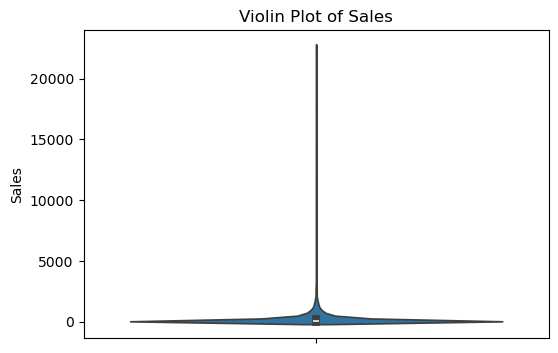

In [150]:
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.violinplot(y=sale_data['Sales'])
plt.title('Violin Plot of Sales')
plt.show()


In [151]:
num_cols = ['Sales', 'Profit']

# Dictionary to store IQR ranges
iqr_ranges = {}

for col in num_cols:
    Q1 = sale_data[col].quantile(0.25)
    Q3 = sale_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    iqr_ranges[col] = (lower, upper)
    
    # Identify outliers
    outliers = sale_data[(sale_data[col] < lower) | (sale_data[col] > upper)]
    print(f"{col} Outliers count:", outliers.shape[0])

Sales Outliers count: 1167
Profit Outliers count: 1881


In [153]:
# Filter negative profit rows
negative_profit = sale_data[sale_data['Profit'] < 0]

# Count how many negative profits
print("Total Negative Profit Rows:", negative_profit.shape[0])

# Peek first 5 rows
negative_profit.head()


Total Negative Profit Rows: 1871


,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Month,Quarter,Sales_Clean,Profit_Clean
2,<NA>,2019-01-04,2019-01-08,Standard Class,<NA>,Phillina Ober,Home Office,United States,Naperville,Illinois,...,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748,1,1,272.736,-64.7748
3,<NA>,2019-01-04,2019-01-08,Standard Class,<NA>,Phillina Ober,Home Office,United States,Naperville,Illinois,...,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870,1,1,3.540,-5.4870
14,<NA>,2019-01-07,2019-01-12,Standard Class,<NA>,Vivek Sundaresam,Consumer,United States,Huntsville,Texas,...,Furnishings,"Howard Miller 14-1/2"" Diameter Chrome Round Wa...",76.728,3,0.6,-53.7096,1,1,76.728,-53.7096
15,<NA>,2019-01-07,2019-01-12,Standard Class,<NA>,Vivek Sundaresam,Consumer,United States,Huntsville,Texas,...,Binders,Acco Four Pocket Poly Ring Binder with Label H...,10.430,7,0.8,-18.2525,1,1,10.430,-18.2525
24,<NA>,2019-01-13,2019-01-18,Standard Class,<NA>,Michael Moore,Consumer,United States,Newark,Ohio,...,Binders,Avery Metallic Poly Binders,3.438,2,0.7,-2.5212,1,1,3.438,-2.5212


In [154]:
# Total negative profit by Category
neg_by_category = negative_profit.groupby('Category')['Profit'].sum().sort_values()
print(neg_by_category)

# Total negative profit by Ship Mode
neg_by_shipmode = negative_profit.groupby('Ship Mode')['Profit'].sum().sort_values()
print(neg_by_shipmode)

# Total negative profit by State
neg_by_state = negative_profit.groupby('State')['Profit'].sum().sort_values()
print(neg_by_state)


Category
Furniture         -60936.1090
Office Supplies   -56615.2585
Technology        -38579.9182
Name: Profit, dtype: float64
Ship Mode
Standard Class   -100348.5365
Second Class      -24224.3729
First Class       -22660.2709
Same Day           -8898.1054
Name: Profit, dtype: float64
State
Texas            -36813.1875
Ohio             -21750.0002
Pennsylvania     -21602.8515
Illinois         -19501.6975
North Carolina   -11557.9854
Colorado          -8900.9048
Florida           -8689.8295
Tennessee         -7257.0174
Arizona           -6656.7675
New York          -5031.1378
California        -3769.6651
Oregon            -2890.4764
Massachusetts      -566.2617
Washington         -387.8706
Rhode Island       -230.1678
Nevada             -109.5822
New Hampshire      -105.3164
Delaware            -85.8963
West Virginia       -76.9536
Maryland            -71.1170
New Jersey          -51.2906
Connecticut         -19.6146
New Mexico           -5.6943
Name: Profit, dtype: float64


C:\Users\123\AppData\Local\Temp\ipykernel_5988\2351906089.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


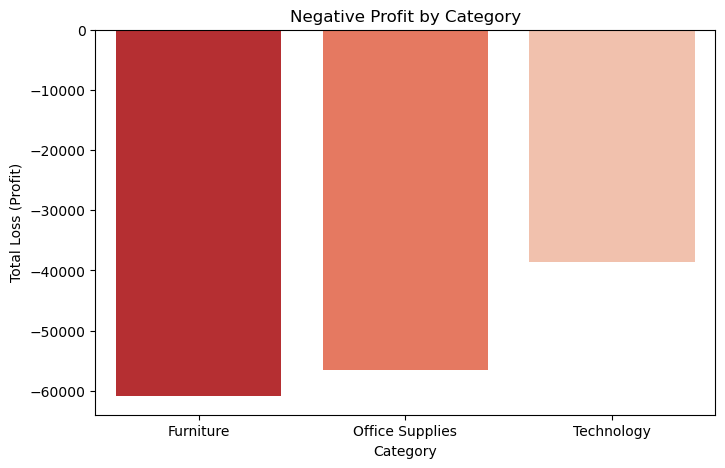

In [155]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.barplot(
    data=negative_profit.groupby('Category')['Profit'].sum().reset_index(),
    x='Category',
    y='Profit',
    palette='Reds_r'
)
plt.title('Negative Profit by Category')
plt.xlabel('Category')
plt.ylabel('Total Loss (Profit)')
plt.show()


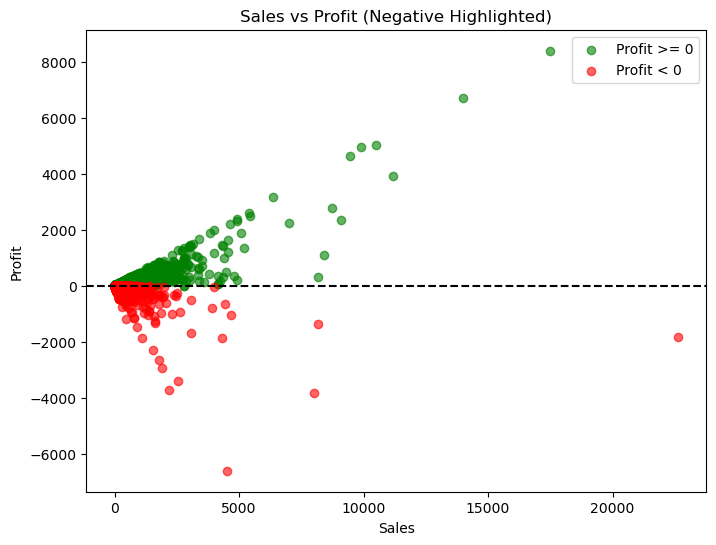

In [156]:
plt.figure(figsize=(8,6))

# Positive profit green
plt.scatter(
    sale_data['Sales'][sale_data['Profit']>=0],
    sale_data['Profit'][sale_data['Profit']>=0],
    color='green', alpha=0.6, label='Profit >= 0'
)

# Negative profit red
plt.scatter(
    sale_data['Sales'][sale_data['Profit']<0],
    sale_data['Profit'][sale_data['Profit']<0],
    color='red', alpha=0.6, label='Profit < 0'
)

plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.title('Sales vs Profit (Negative Highlighted)')
plt.legend()
plt.show()
